In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
import re
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
import flask
import matplotlib.pyplot as plt

'\nfrom IPython.display import Image\nfrom IPython.display import display'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
%matplotlib inline
plt.style.use('ggplot')
full_df = pd.read_csv(r"C:\Users\Nicz\Documents\GitHub\3204-CourseWork2\shuffled-noIPV6.csv")
# full_df = pd.read_csv(r"fortf.csv")

print(f"[*] Shape of dataset: {full_df.shape}")
from sklearn.utils import shuffle
full_df.drop(full_df.columns[0], axis=1, inplace=True)
full_df = shuffle(full_df)

print(full_df.tail())
print("\n")

[*] Shape of dataset: (92704, 15)
       @timestamp           src_ip src_port         dst_ip dst_port Protocol  \
6376   1666582464  192.168.207.142        0              0        0    HTTPS   
56902  1666690179    192.168.34.11    53206  192.168.33.12        0     HTTP   
61909  1666690179    192.168.34.11    53206  192.168.33.12        0     HTTP   
90051  1666691985    100.64.19.103    44618   100.64.19.22     8443      TCP   
36808  1666591247        10.0.0.20    33762      10.0.0.21     3306    mysql   

      http_request_method http_request_referrer http_response_code  \
6376                  GET                     0                404   
56902                   0                     0                  0   
61909                   0                     0                  0   
90051                   0                     0                  0   
36808                   0                     0                  0   

                  url_path user_agent_original sql_method       

In [49]:
full_df["src_port"]=  full_df["src_port"].replace(regex=",", value= "")
full_df["src_port"]=  full_df["src_port"].replace(regex=",", value= "")
full_df["dst_port"]=  full_df["dst_port"].replace(regex=",", value= "")
full_df["dst_port"]=  full_df["dst_port"].replace(regex=" ", value= "")
full_df["src_port"] = full_df["src_port"].replace(regex=" ", value="")
full_df["src_port"] = full_df["src_port"].replace(regex="dns", value="53")
full_df["src_port"] = full_df["src_port"].replace(regex="tls", value="0")
full_df["dst_port"] = full_df["dst_port"].replace(regex="dns", value="53")
full_df["dst_ip"] = full_df["dst_ip"].replace(regex="\S*:+\S+", value="0")

In [67]:
scores = {}
scores_list= []

k_value=[]
model_scores={}
accuracy_dict={}
precision_dict={}
cm_dict={}
recall_dict={}
f1_dict={}
algo_accuracy={}
algo_precision={}
algo_recall={}
algo_f1={}

def scoring_metrics(y_test, y_pred, model):
    print(f"y_test size:{y_test.size} y_pred size:{y_pred.size}")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average="weighted")
    recall = metrics.recall_score(y_test, y_pred, average="weighted")
    f1_score = metrics.f1_score(y_test, y_pred, average="weighted")
    
    scores[model] = accuracy
    scores_list.append(accuracy)
#     confusion_matrix = metrics.confusion_matrix(y_true=[True, True], y_pred=[True, True], labels=[True, False])
    cm = metrics.confusion_matrix(y_test, y_pred, labels=['ldap_enumeration','nmap_scan', 'port_scan', 'smtp_enumeration', 'sql_enumeration', 'web_enumeration'])
    
    k_value.append(model)
    accuracy_dict[model]= accuracy
    precision_dict[model]= precision
    recall_dict[model]= recall
    f1_dict[model]= f1_score
    
    algo_precision["KNN"]=precision
    algo_recall["KNN"]=recall
    algo_f1["KNN"]=f1_score
        
    print(f"Confusion Matrix: {cm}")
    
    print(f"\n[*] Model: {model}")
    print("[*]Precision: {:.3f}%".format(precision))
    print("[*] Recall: {:.3f}%".format(recall))

    print("[*] Accuracy: {:.3f}%".format(accuracy))
    print("[*] F1_score: {:.3f}%".format(f1_score))


# KNN

In [68]:
df = full_df.head(25000)

In [69]:
print("Doing")
from sklearn.preprocessing import OneHotEncoder
df.replace(to_replace=["None"], value=np.nan, inplace=True)
clean_df = df.fillna(str(0)) #uhm i dont knowhow to explain this, but please lmk another alternative to fix this cause :") try to run it without str and you will know what i mean"
clean_x = clean_df.iloc[:, :13].values
clean_y = clean_df["category"].values
features = df.columns.values[:-1]

for label in clean_df.columns:
    for index, rows in clean_df.iterrows():
        new_ip = ""
        ip = str(rows[label])
        if re.search("\d+\.\d+\.\d+\.\d+", ip):
            octets = ip.split(".")
            for octet in octets:
                octet = octet.rjust(3,"0")
                new_ip += octet
            clean_df[label][index] = new_ip

clean_df["http_response_code"] = clean_df["http_response_code"].replace('HTTP/1.1"', value="0")
clean_df["src_ip"] = clean_df["src_ip"].replace('::1', value="0")
clean_df["dst_ip"] = clean_df["dst_ip"].replace('::1', value="0")
# clean_df["http_response_code"] = clean_df["http_response_code"].replace('HTTP/1.1"', value="0")
print("Done")

Doing


C:\Users\Nicz\AppData\Local\Temp\ipykernel_65248\1930992280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=["None"], value=np.nan, inplace=True)
C:\Users\Nicz\AppData\Local\Temp\ipykernel_65248\1930992280.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[label][index] = new_ip


Done


In [70]:
clean_x = clean_df.iloc[:, :13] #honestly don't know if this is correct lmaoooo
#this is to iterate through the columns and convert the strings to float (passthrough means for those columns we didnt specify, leave it as it is)
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['Protocol', 'http_request_method', 'http_request_referrer', 'url_path', 'user_agent_original', 'sql_method', 'sql_query']),remainder='passthrough')
test = column_trans.fit_transform(clean_x) #this is technically our cl

In [71]:
x_train, x_test, y_train, y_test = train_test_split(test, clean_y, test_size=0.3)
# x_variable_train , x_variable_test , y_variable_train , y_variable_test  = train_test_split(test, clean_y, test_size=0.3)

In [ ]:
# k = 5
# knn = KNeighborsClassifier(n_neighbors=k)
# knn.fit(x_train, y_train)
# # print(f"Saving trained model to test-knn{k}.sav")
# # pickle.dump(knn, open(f"test-knn{k}.sav", "wb"))
# # print("Model Saved")

# # print("Loading knn from pickle")
# # knn = pickle.load(open("knn5.sav", "rb"))
# # print("KNN Successfully loaded")

# y_pred = knn.predict(x_test)
# scoring_metrics(y_test, y_pred, f"knn {k}")

In [72]:
scores = {}
scores_list= []

range_k = range(100, 160, 11)
knn = ""
skip = False

for k in range_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
#     pickle.dump(knn, open(f"knn{k}.sav", "wb"))

    y_pred = knn.predict(x_test)
    scoring_metrics(y_test, y_pred, f"knn {k}")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    

y_test size:7500 y_pred size:7500
Confusion Matrix: [[   0    0    0    0    0    0]
 [   0  697    0    0    0    0]
 [   0    0 3587    2   15    1]
 [   0    0    4   20    0    0]
 [   0    0    9    0  949    0]
 [   0    0   16   14    2 2184]]

[*] Model: knn 100
[*]Precision: 0.992%
[*] Recall: 0.992%
[*] Accuracy: 0.992%
[*] F1_score: 0.992%
y_test size:7500 y_pred size:7500
Confusion Matrix: [[   0    0    0    0    0    0]
 [   0  697    0    0    0    0]
 [   0    0 3587    2   15    1]
 [   0    0    4   20    0    0]
 [   0    0    9    0  949    0]
 [   0    0   16   14    2 2184]]

[*] Model: knn 111
[*]Precision: 0.992%
[*] Recall: 0.992%
[*] Accuracy: 0.992%
[*] F1_score: 0.992%
y_test size:7500 y_pred size:7500
Confusion Matrix: [[   0    0    0    0    0    0]
 [   0  697    0    0    0    0]
 [   0    0 3577   12   15    1]
 [   0    0    4   20    0    0]
 [   0    0    9    0  949    0]
 [   0    0   16   14    2 2184]]

[*] Model: knn 122
[*]Precision: 0.992%
[*

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini",
                             min_samples_split = 20,
                             min_samples_leaf = 6,
                             max_depth = 100,
                             n_estimators=500,
                             random_state=5) #can put any number here

In [57]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

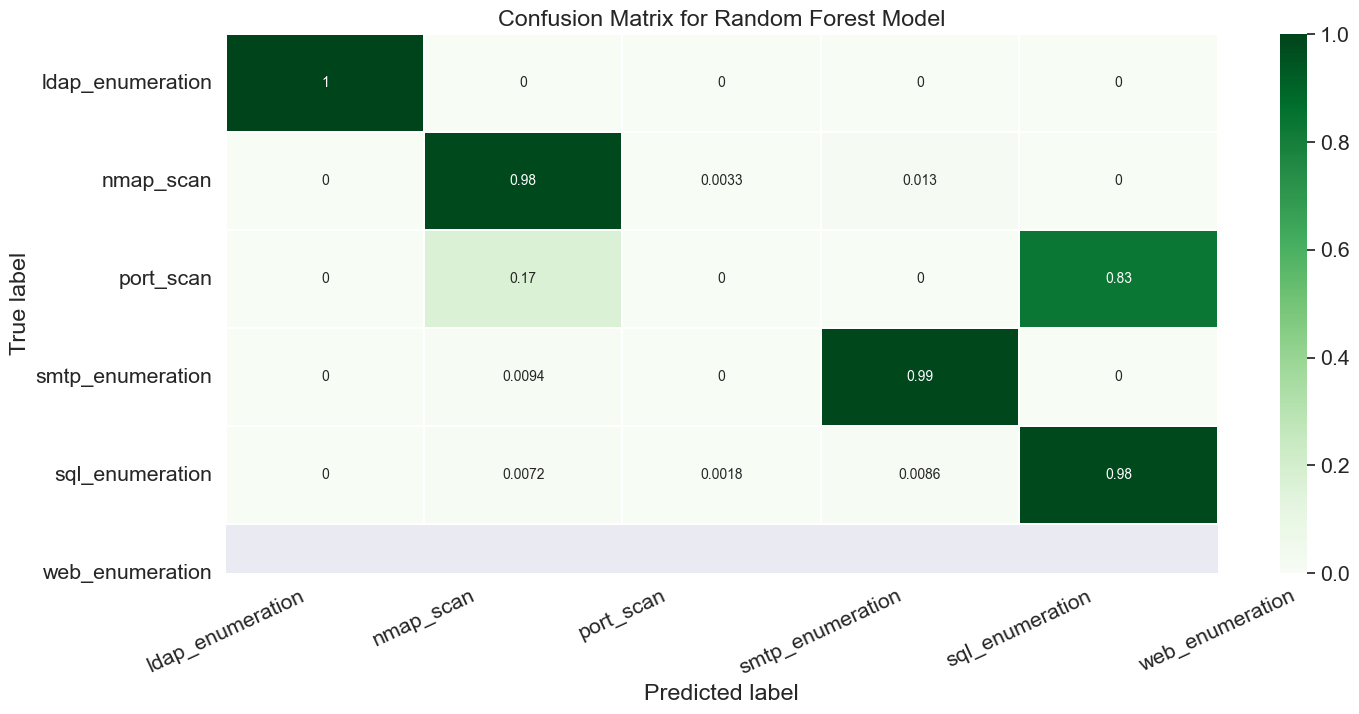

Classification Report 
 {'ldap_enumeration': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'nmap_scan': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 697}, 'port_scan': {'precision': 0.9839112343966713, 'recall': 0.9918903803131991, 'f1-score': 0.9878846957248295, 'support': 3576}, 'smtp_enumeration': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16}, 'sql_enumeration': {'precision': 0.9906054279749478, 'recall': 0.9358974358974359, 'f1-score': 0.962474645030426, 'support': 1014}, 'web_enumeration': {'precision': 0.9824007220216606, 'recall': 0.9908966772872099, 'f1-score': 0.9866304101518242, 'support': 2197}, 'micro avg': {'precision': 0.9826666666666667, 'recall': 0.9826666666666667, 'f1-score': 0.9826666666666667, 'support': 7500}, 'macro avg': {'precision': 0.6594862307322132, 'recall': 0.6531140822496408, 'f1-score': 0.6561649584845134, 'support': 7500}, 'weighted avg': {'precision': 0.9837699819267576, 'recall': 0.9826666666666

c:\users\nicz\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nicz\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nicz\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
from sklearn.metrics import confusion_matrix

## ==== CONFUSION MATRIX ====
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sb.set(font_scale=1.4)
sb.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['ldap_enumeration','nmap_scan', 'port_scan', 'smtp_enumeration', 'sql_enumeration', 'web_enumeration']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


RF_accuracy= accuracy_score(y_test, y_pred)
algo_accuracy["Random Forest"]= RF_accuracy

precision = precision_score(y_test, y_pred,average="weighted")
algo_precision["RF"] = precision

f1_score = f1_score(y_test, y_pred,average="weighted")
algo_f1["RF"]=f1_score

recall = recall_score(y_test, y_pred,average="weighted")
algo_recall["RF"]=recall


print("Classification Report \n" , classification_report(y_pred, y_test, labels=['ldap_enumeration','nmap_scan', 'port_scan', 'smtp_enumeration', 'sql_enumeration', 'web_enumeration'], output_dict=True))
#print("Accuracy Score:\n",(accuracy_score(y_test, y_pred)))
#print("Precision Score:\n",(precision_score(y_test, y_pred,average="weighted")))
#print("Precision Score:\n",(f1_score(y_test, y_pred,average="weighted")))


C:\Users\Nicz\AppData\Local\Temp\ipykernel_65248\1059628183.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45)


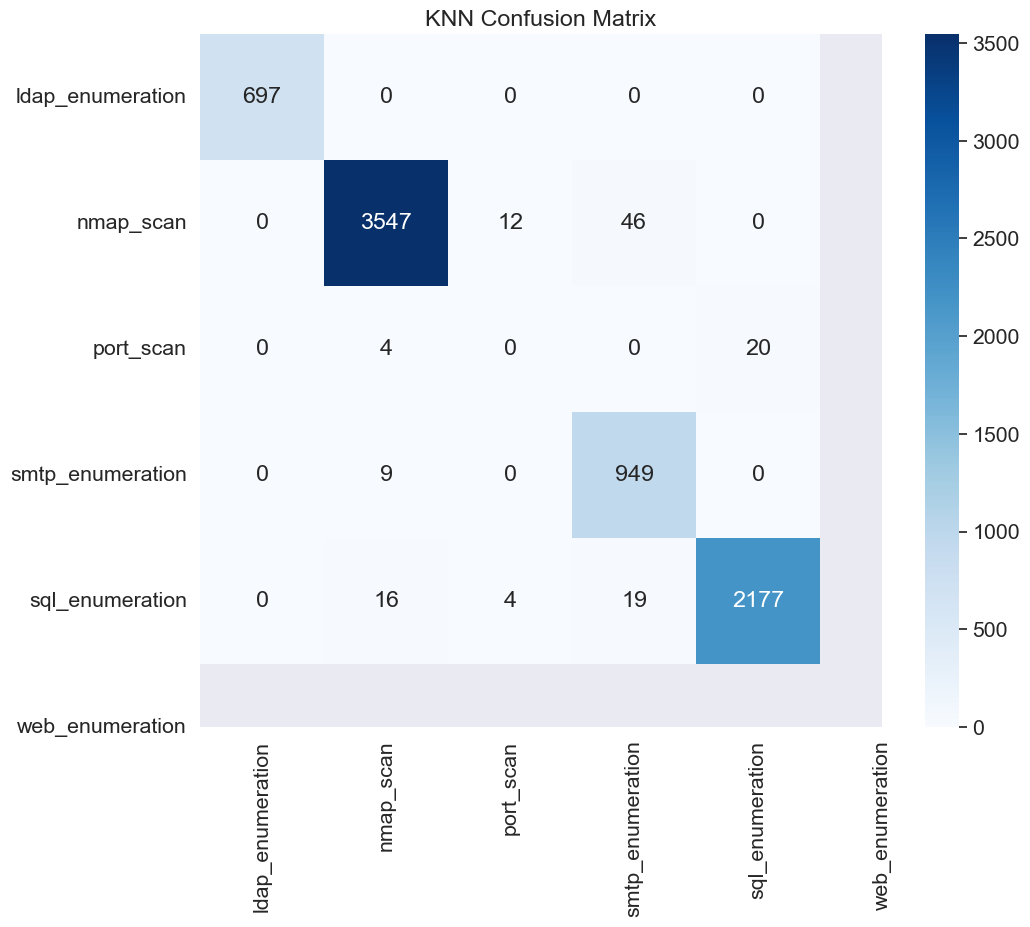

In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(11, 9))

categories = ['ldap_enumeration','nmap_scan', 'port_scan', 'smtp_enumeration', 'sql_enumeration', 'web_enumeration']
ax.set_xticklabels(categories, rotation=45)
                   
sb.heatmap(confusion_matrix, annot=True, fmt='0', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('KNN Confusion Matrix')
plt.savefig('KNN_ConfusionMatrix.png')

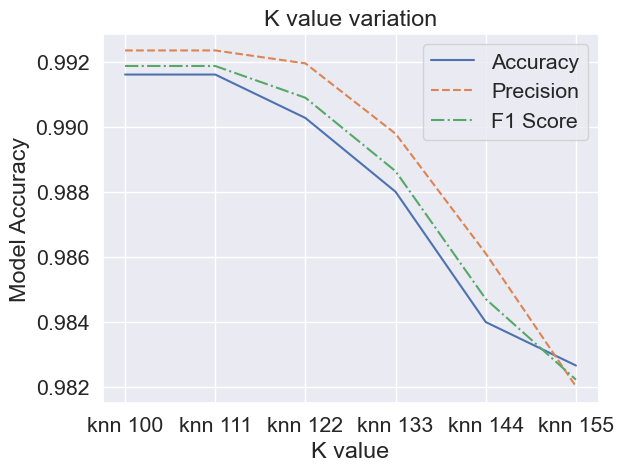

In [76]:
plt.title('K value variation')
plt.xlabel('K value')
plt.ylabel('Model Accuracy')

k_value = list(accuracy_dict.keys())
algo_accuracy["KNN"]= accuracy_dict['knn 133']
plt.plot(k_value, accuracy_dict.values(), label = "Accuracy", linestyle="-")
plt.plot(k_value, precision_dict.values(), label = "Precision", linestyle="--")
plt.plot(k_value, f1_dict.values(), label = "F1 Score", linestyle="-.")

plt.legend(loc="upper right")
plt.savefig('KNN_graph.png')
plt.show()

{'KNN': 0.9826666666666667, 'RF': 0.9826666666666667}


<BarContainer object of 2 artists>

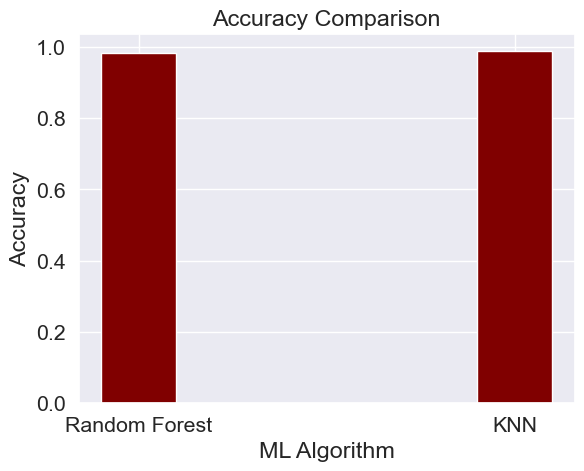

In [79]:
plt.title('Accuracy Comparison')
plt.xlabel('ML Algorithm')
plt.ylabel('Accuracy')

print(algo_recall)
plt.bar(algo_accuracy.keys(), algo_accuracy.values(), color ='maroon',width = 0.2)

In [13]:
import io
import random
import matplotlib.pyplot as plt
from flask import Flask, render_template, Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

app = Flask(__name__)

@app.route('/')
def home():
#     return "Welcome"
    return ('<img src="knn_plot.png" alt="Plot" width="500" height="600">')

@app.route('/knn_plot.png')
def knn_plot_png():
    fig_knn = knn_accuracy()
    output = io.BytesIO()
    FigureCanvas(fig_knn).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

def knn_accuracy():
    figure, axis = plt.subplots(1, 2)
#     figure = Figure()
#     axis = figure.add_subplot(1, 2)    
    models = [100, 111, 122, 133, 144, 155]
    y1 = [99, 100, 122, 133, 144, 155]
    y2 = [100, 100, 122, 133, 144, 155]
    y3 = [90, 90, 122, 133, 144, 155]

    # For F1_score
    axis[0].plot(models, y1, label = "F1", linestyle="-")
    axis[0].legend()
    axis[0].set_title("F1_score")

    # For Accuracy/Precision
    axis[1].plot(models, y2, label = "accuracy", linestyle="-")
    axis[1].plot(models, y3, label = "precision", linestyle="--")
    axis[1].legend()
    axis[1].set_title("Accuracy/Precision")
    return figure

In [18]:
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
